In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv('Data/my_PJME_MW.csv', index_col=[0], parse_dates=[0])

In [79]:
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [80]:
data_w = data.resample('W').mean()

In [81]:
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


In [82]:
data_w = data_w.drop('hour', axis=1)

In [83]:
data_w = data_w.drop('dayofweek', axis=1)

In [84]:
data_w = data_w.drop('year', axis=1)

In [85]:
data_w = data_w.drop('dayofmonth', axis=1)
data_w = data_w.drop('dayofyear', axis=1)

In [86]:
data_w.head()

,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0.000000,0.167832
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,0.000000,0.000000
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,0.142857,0.000000
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0.000000,0.142857
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,0.000000,0.000000


In [87]:
data_w = data_w.drop('is_next_holiday', axis=1)
data_w = data_w.drop('is_prev_holiday', axis=1)

In [88]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [89]:
scaler = StandardScaler()
tsne_ = TSNE(n_components=2, random_state=42)

X = data_w.values
X_scaled = scaler.fit_transform(X)
X_tsne = tsne_.fit_transform(X_scaled)

In [90]:
import seaborn as sns

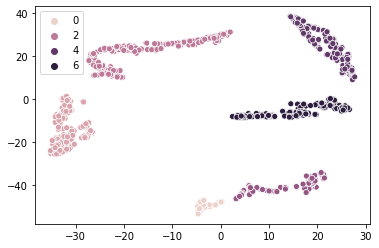

In [91]:
cluster = DBSCAN(eps=3, leaf_size=15)
X_clusters = cluster.fit_predict(X_tsne)

sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=X_clusters)

In [92]:
data_w['cluster'] = X_clusters
data_w.head()

,PJME_MW,month,quarter,weekofyear,is_holiday,cluster
Date,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,1
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,1
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,1


In [93]:
from sklearn.decomposition import PCA

In [94]:
pca_ = PCA(n_components=2, svd_solver='full')

X_pca = pca_.fit_transform(X_scaled)

In [95]:
data_w['pca1'] = X_pca[:, 0]
data_w['pca2'] = X_pca[:, 1]

In [96]:
data_w['diff'] = data_w['PJME_MW'].diff()
data_w.head()

,PJME_MW,month,quarter,weekofyear,is_holiday,cluster,pca1,pca2,diff
Date,,,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0,-2.456786,1.645752,NaN
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,1,-2.657596,-0.398610,-904.773934
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,1,-2.618849,-0.405877,-34.505952
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0,-2.335608,1.006388,-1311.351190
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,1,-2.434401,-0.837669,-945.041667


In [97]:
data_w['log'] = np.log(data_w['PJME_MW'])

In [98]:
data_w['log_quot'] = 0
log_quot = data_w['log'].iloc[1:].values/data_w['log'].iloc[:-1].values
data_w['log_quot'].iloc[1:] = log_quot

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [99]:
data_w.head()

,PJME_MW,month,quarter,weekofyear,is_holiday,cluster,pca1,pca2,diff,log,log_quot
Date,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0,-2.456786,1.645752,NaN,10.385672,0.000000
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,1,-2.657596,-0.398610,-904.773934,10.357342,0.997272
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,1,-2.618849,-0.405877,-34.505952,10.356246,0.999894
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0,-2.335608,1.006388,-1311.351190,10.313659,0.995888
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,1,-2.434401,-0.837669,-945.041667,10.281804,0.996911


In [100]:
data_w['rolling4'] = data_w['PJME_MW'].rolling(window=4).mean()

In [101]:
data_w.head()

,PJME_MW,month,quarter,weekofyear,is_holiday,cluster,pca1,pca2,diff,log,log_quot,rolling4
Date,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0,-2.456786,1.645752,NaN,10.385672,0.000000,NaN
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,1,-2.657596,-0.398610,-904.773934,10.357342,0.997272,NaN
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,1,-2.618849,-0.405877,-34.505952,10.356246,0.999894,NaN
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0,-2.335608,1.006388,-1311.351190,10.313659,0.995888,31368.489615
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,1,-2.434401,-0.837669,-945.041667,10.281804,0.996911,30569.571429


In [102]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_w['exp_001'] = exponential_smoothing(data_w['PJME_MW'], 0.01)
data_w['exp_003'] = exponential_smoothing(data_w['PJME_MW'], 0.03)
data_w['exp_005'] = exponential_smoothing(data_w['PJME_MW'], 0.05)
data_w['exp_007'] = exponential_smoothing(data_w['PJME_MW'], 0.07)
data_w['exp_009'] = exponential_smoothing(data_w['PJME_MW'], 0.09)

In [103]:
p=8
for i in range(1, p+1):
    data_w['t'+str(i)] = 0.0
    data_w['t'+str(i)].values[i:] = data_w['PJME_MW'].values[:-i]

In [104]:
for i in range(1, p+1):
    data_w['diff_t'+str(i)] = 0.0
    data_w['diff_t'+str(i)].values[i:] = data_w['diff'].values[:-i]

In [105]:
data_w = data_w.fillna(0)

In [106]:
h=4
scl = StandardScaler()
target = data_w['PJME_MW'].values[h+p:].reshape((-1, 1))
scaled_target = scl.fit_transform(target)
scaled_target.shape

(854, 1)

In [107]:
scl_x = StandardScaler()

X_r = data_w.iloc[p:-h, :].values
X_r_scaled = scl_x.fit_transform(X_r.astype('float64'))
X_r_scaled.shape

(854, 33)

In [108]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression

In [109]:
skb = SelectKBest(f_regression, k=5)

X_skb = skb.fit_transform(X_r_scaled, scaled_target.ravel())
list_param_skb = np.where(skb.get_support())[0]
list_param_skb

array([ 0,  7,  9, 23, 24], dtype=int64)

In [110]:
sp = SelectPercentile(f_regression, percentile=10)

X_sp = sp.fit_transform(X_r_scaled, scaled_target.ravel())
list_param_sp = np.where(sp.get_support())[0]
list_param_sp

array([ 0,  9, 23, 24], dtype=int64)

In [111]:
model = GradientBoostingRegressor(max_depth=5, random_state=42, n_estimators=100)
model.fit(X_r_scaled, scaled_target.ravel())
sfm = SelectFromModel(model, max_features=5)
X_sfm = sfm.fit_transform(X_r_scaled, scaled_target.ravel())
list_param_sfm = np.where(sfm.get_support())[0]
list_param_sfm

array([ 1,  3,  6,  9, 24], dtype=int64)

In [112]:
result_list = list(set((*list_param_skb, *list_param_sp, *list_param_sfm)))
result_list

[0, 1, 3, 6, 7, 9, 23, 24]

In [113]:
X_selected = X_r_scaled[:, result_list]

In [114]:
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

In [115]:
train, test = split_data(data_w, '01-06-2016')

In [116]:
X_train = X_selected[:train.shape[0], :]
y_train = scaled_target[:train.shape[0], 0]
X_test = X_selected[train.shape[0]:, :]
y_test = scaled_target[train.shape[0]:, 0]

In [117]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

In [118]:
param_dist = {"max_depth": [3, 2,10,14,5], 
              "n_estimators":[100,200,300,400,500, 1000, 1200,1500]}

In [119]:
model_gb = GradientBoostingRegressor()

search = GridSearchCV(model_gb, param_grid=param_dist, scoring='r2', n_jobs=-1)

search.fit(X_train, y_train)
search.best_score_, search.best_params_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(0.5881852904437157, {'max_depth': 2, 'n_estimators': 200})

In [120]:
model_gb_b = GradientBoostingRegressor(max_depth=2, n_estimators=200)

model_gb_b.fit(X_train, y_train)
y_pred = model_gb_b.predict(X_test)

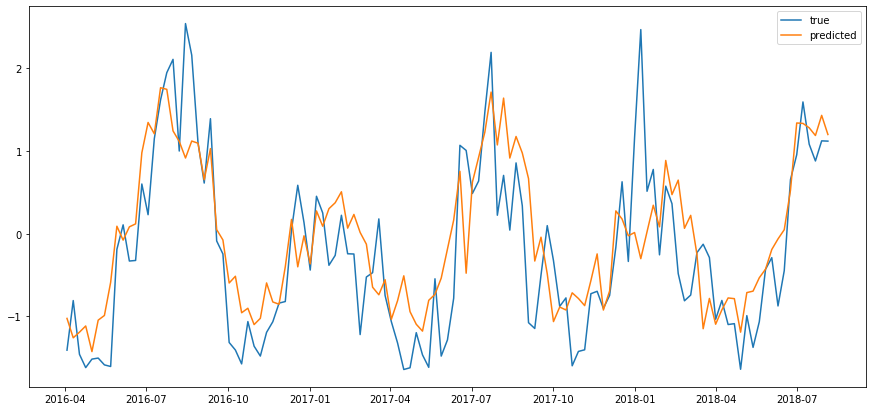

In [121]:
plt.figure(figsize=(15,7))

plt.plot(test.index[h+p:], y_test, label='true')
plt.plot(test.index[h+p:], y_pred, label='predicted')
plt.legend()

In [122]:
r2_score(y_test, y_pred)

0.6137776189841726

In [137]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [138]:
mean_absolute_percentage_error(scl.inverse_transform(y_test), scl.inverse_transform(y_pred))

6.375694125838556

Теперь построим модель с горизонтом предсказания h=1

In [123]:
h=1
scl_1 = StandardScaler()
target_1 = data_w['PJME_MW'].values[h+p:].reshape((-1, 1))
scaled_target_1 = scl_1.fit_transform(target_1)
scaled_target_1.shape

(857, 1)

In [124]:
scl_x_1 = StandardScaler()

X_r_1 = data_w.iloc[p:-h, :].values
X_r_1_scaled = scl_x_1.fit_transform(X_r_1.astype('float64'))
X_r_1_scaled.shape

(857, 33)

In [125]:
skb_1 = SelectKBest(f_regression, k=5)

X_1_skb = skb_1.fit_transform(X_r_1_scaled, scaled_target_1.ravel())
list_param_skb_1 = np.where(skb_1.get_support())[0]
list_param_skb_1

array([ 0,  7,  9, 11, 17], dtype=int64)

In [126]:
sp_1 = SelectPercentile(f_regression, percentile=10)

X_1_sp = sp_1.fit_transform(X_r_1_scaled, scaled_target_1.ravel())
list_param_sp_1 = np.where(sp_1.get_support())[0]
list_param_sp_1

array([ 0,  9, 11, 17], dtype=int64)

In [127]:
model = GradientBoostingRegressor(max_depth=5, random_state=42, n_estimators=100)
model.fit(X_r_1_scaled, scaled_target_1.ravel())
sfm_1 = SelectFromModel(model, max_features=5)
X_1_sfm = sfm_1.fit_transform(X_r_1_scaled, scaled_target_1.ravel())
list_param_sfm_1 = np.where(sfm_1.get_support())[0]
list_param_sfm_1

array([ 0,  6,  9, 24], dtype=int64)

In [128]:
result_list_1 = list(set((*list_param_skb_1, *list_param_sp_1, *list_param_sfm_1)))
result_list_1

[0, 6, 7, 9, 11, 17, 24]

In [130]:
X_1_selected = X_r_1_scaled[:, result_list]

In [131]:
train_1, test_1 = split_data(data_w, '01-06-2016')

In [132]:
X_train_1 = X_1_selected[:train_1.shape[0], :]
y_train_1 = scaled_target_1[:train_1.shape[0], 0]
X_test_1 = X_1_selected[train_1.shape[0]:, :]
y_test_1 = scaled_target_1[train_1.shape[0]:, 0]

In [133]:
model_gb = GradientBoostingRegressor()

search = GridSearchCV(model_gb, param_grid=param_dist, scoring='r2', n_jobs=-1)

search.fit(X_train_1, y_train_1)
search.best_score_, search.best_params_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(0.6750321806841648, {'max_depth': 2, 'n_estimators': 100})

In [134]:
model_gb_b_1 = GradientBoostingRegressor(max_depth=2, n_estimators=100)

model_gb_b_1.fit(X_train_1, y_train_1)
y_pred_1 = model_gb_b_1.predict(X_test_1)

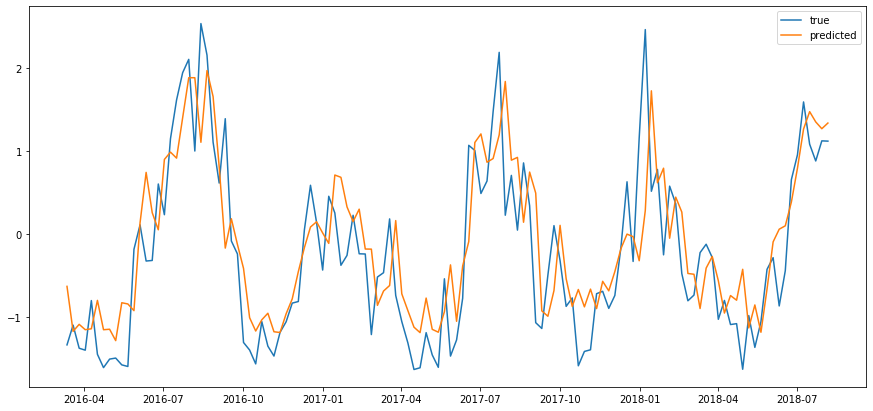

In [135]:
plt.figure(figsize=(15,7))

plt.plot(test_1.index[h+p:], y_test_1, label='true')
plt.plot(test_1.index[h+p:], y_pred_1, label='predicted')
plt.legend()

In [136]:
r2_score(y_test_1, y_pred_1)

0.6278970107187194

In [139]:
mean_absolute_percentage_error(scl_1.inverse_transform(y_test_1), scl_1.inverse_transform(y_pred_1))

6.392014750436722

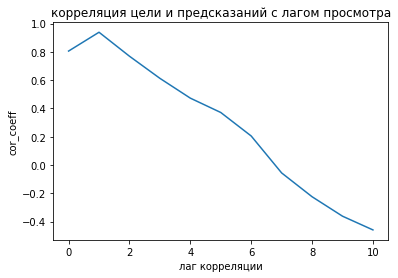

In [142]:
lag=10
p_cor=[np.corrcoef( y_test_1, y_pred_1)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test_1[:-(i+1)], y_pred_1[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция цели и предсказаний с лагом просмотра')
plt.show()

In [143]:
data_w.columns[result_list_1]

Index(['PJME_MW', 'pca1', 'pca2', 'log', 'rolling4', 't1', 't8'], dtype='object')

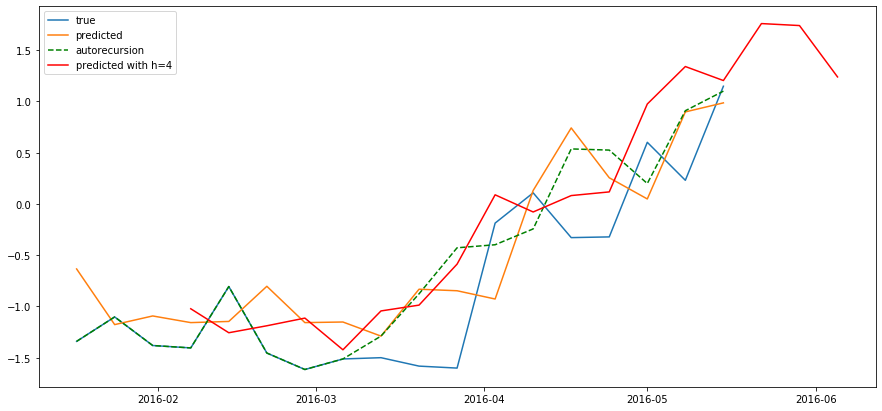

In [154]:
X_test_auto = X_test_1.copy()
y_test_auto = y_test_1.copy()
N=18
for i in range(p, p+N):
    y_test_auto[i] = model_gb_b_1.predict(X_test_auto[i, :].reshape((1, -1)))
    y_i = scl_1.inverse_transform(y_test_auto[i:i+1])
    
    X_test_auto[i+1, 0] = (y_i - scl_x_1.mean_[0])/scl_x_1.scale_[0]
    X_test_auto[i+1, 3] = np.log(y_i)
    X_test_auto[i+1, 5] = X_test_auto[i-1, 0]
    X_test_auto[i+1, 6] = X_test_auto[i-8, 0]

plt.figure(figsize=(15,7))
plt.plot(test_1.index[1:N+1], y_test_1[:N], label='true')
plt.plot(test_1.index[1:N+1], y_pred_1[:N], label='predicted')
plt.plot(test_1.index[1:N+1], y_test_auto[:N], '--g', label='autorecursion')
plt.plot(test.index[4:N+4], y_pred[:N], 'r', label='predicted with h=4')
plt.legend()

In [156]:
X_test_100 = X_test_1.copy()
y_test_100 = y_test_1.copy()
for i in range(p, p+101):
    y_test_auto[i] = model_gb_b_1.predict(X_test_auto[i, :].reshape((1, -1)))
    y_i = scl_1.inverse_transform(y_test_auto[i:i+1])
    
    X_test_auto[i+1, 0] = (y_i - scl_x_1.mean_[0])/scl_x_1.scale_[0]
    X_test_auto[i+1, 3] = np.log(y_i)
    X_test_auto[i+1, 5] = X_test_auto[i-1, 0]
    X_test_auto[i+1, 6] = X_test_auto[i-8, 0]
    if (i-p)%10 == 0 and i-p != 0:
        err = mean_absolute_percentage_error(scl_1.inverse_transform(y_test[:i]), scl_1.inverse_transform(y_test_100[:i]))
        print(f'Ошибка для первых {i-p} точек: {err}')

Ошибка для первых 10 точек: 8.009575593098207
Ошибка для первых 20 точек: 9.817943650100682
Ошибка для первых 30 точек: 9.2502167129079
Ошибка для первых 40 точек: 8.457740008362387
Ошибка для первых 50 точек: 8.46230582535757
Ошибка для первых 60 точек: 8.615340587820008
Ошибка для первых 70 точек: 9.296289494152159
Ошибка для первых 80 точек: 9.313755886126227
Ошибка для первых 90 точек: 9.551106439652141
Ошибка для первых 100 точек: 9.485640397036722


Ошибка имеет теннденцию на увеличение при увеличении дальности прогноза рекурсивного метода.